# **BMEN 415 - Final Project - Mateo**
**Classification - Breast Cancer**

#### Import datasets

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df_train = pd.read_csv('https://raw.githubusercontent.com/MateoRuMo/BMEN415Group8/main/Classification%20-%20Training.csv')
df_train = df_train.drop(df_train.columns[0:2], axis = 1)

C:\Users\mateo\AppData\Local\Temp\ipykernel_8120\2297787801.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df_train.corr()


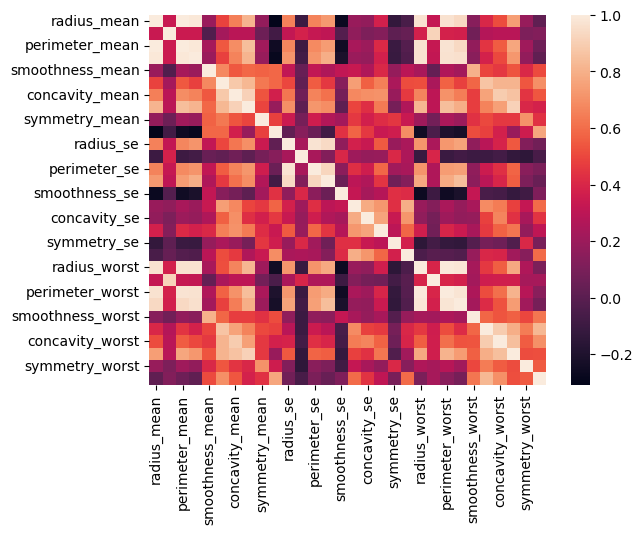

In [2]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

#Create heatmap

correlations = df_train.corr()
sns.heatmap(correlations)
plt.show()

#### Splitting Training Dataset into Independent and Dependent Variable (x and y Datasets)

In [3]:
x = df_train.drop(columns = ['diagnosis'])
y = pd.DataFrame(df_train['diagnosis'], columns = ['diagnosis'])

#### Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 

x_train = sc.fit_transform(x)

#### Creating the Model & Training Model on Training Set

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm

version = 'SVM'

if version == 'KNN':
    model = KNeighborsClassifier(n_neighbors = 100)
elif version == 'NN':
    model = MLPClassifier(activation = 'tanh', solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2))
elif version == 'SVM':
    model = svm.SVC(kernel='sigmoid')

model.fit(x_train,y)




c:\Users\mateo\miniconda3\envs\py3.10\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='sigmoid')

#### Import testing data

In [6]:
df_test = pd.read_csv('https://raw.githubusercontent.com/MateoRuMo/BMEN415Group8/main/Classification%20-%20Testing.csv')
df_test = df_test.drop(df_test.columns[0:2], axis = 1)

#Split into x and y

x_test = df_test.drop(columns = ['diagnosis'])
y_test = pd.DataFrame(df_test['diagnosis'], columns = ['diagnosis'])

#scale features
x_test = sc.transform(x_test)

#### Predict and Compare

In [7]:
y_pred = model.predict(x_test)

y_pred = pd.DataFrame(y_pred, columns = ['y Predicted'])
df_predictions = pd.concat([y_test, y_pred], axis = 1) 
df_predictions.columns = ['y Actual', 'y Predicted']

#### Counting Malignant and Benign Occurence in the Actual and Predicted Datasets

In [8]:
df_counts_a = df_predictions['y Actual'].value_counts().reset_index()
df_counts_p = df_predictions['y Predicted'].value_counts().reset_index()
df_counts = pd.concat([df_counts_a, df_counts_p], axis = 1)
df_counts.columns = ['y Actual Value', 'y Actual Count', 'y Predicted Value', 'y Predicted Count']
df_counts


,y Actual Value,y Actual Count,y Predicted Value,y Predicted Count
0,B,68,B,68
1,M,46,M,46


#### Confusion Matrix & Metrics

Model: SVM
F1 Score:  [0.95588235 0.93478261]
Precison:  [0.95588235 0.93478261]
Recall:  [0.95588235 0.93478261]
Accuracy:  0.9473684210526315


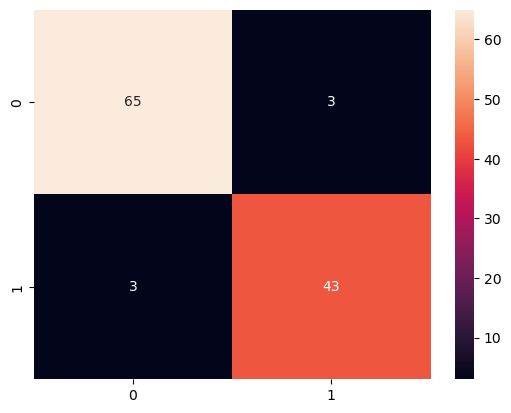

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

print(f'Model: {version}')
print('F1 Score: ', f1_score(y_test, y_pred, average = None))
print('Precison: ', precision_score(y_test, y_pred, average = None))
print('Recall: ', recall_score(y_test, y_pred, average=None))
print('Accuracy: ', accuracy_score(y_test, y_pred))